In [63]:
from freepaths.scatterers import SinusWave
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [39]:
x0 = 1000e-9
y0 = 0
le = 400e-9
gap = 50e-9
dev = 25e-9
thickness = 75e-9

hole = SinusWave(x0=x0, len=le, gap=gap, deviation=dev, y0=y0, thickness=thickness)
hole.bounds

(1.0625e-06, 1.3874999999999998e-06)

In [40]:
x0 = 1000
y0 = 0
le = 400
gap = 50
dev = 100
thickness = 75

hole = SinusWave(x0=x0, len=le, gap=gap, deviation=dev, y0=y0, thickness=thickness)
hole.bounds

(1062.5, 1387.5)

In [41]:
fun_derivative = lambda x: np.array([x*0+1, 2*np.pi*np.sin((x-x0)*2*np.pi/(le+gap))/(le+gap)/2*dev])

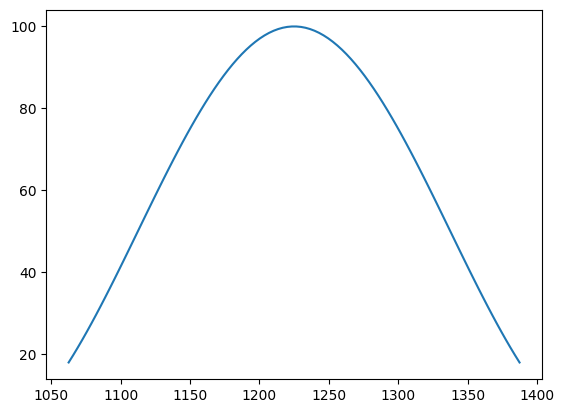

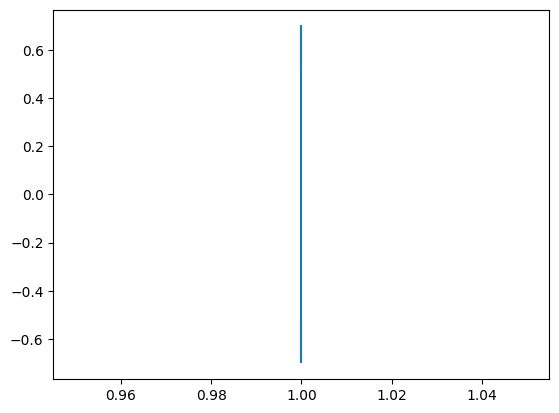

In [42]:
x1 = np.linspace(hole.bounds[0], hole.bounds[1], 100)
y1 = hole.sin_function(x1)
plt.plot(y1[0], y1[1])
plt.show()
y2 = fun_derivative(x1)
plt.plot(y2[0], y2[1])

(1005.0, 1445.0, -27.492691597415284, 145.2801528905275)

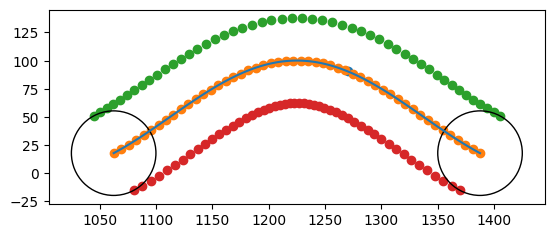

In [66]:
x_point = 1270

point = hole.sin_function(x_point)
plt.scatter(point[0], point[1])

plt.plot(y1[0], y1[1])

# yd = fun_derivative(x_point)
# print(yd)
# vector_x_len = 100
# plt.scatter(point[0]+vector_x_len, point[1]+vector_x_len*yd[1])

xs_to_evaluate = np.linspace(hole.bounds[0], hole.bounds[1], 50)
function_value = hole.sin_function(xs_to_evaluate)
derivative_value = fun_derivative(xs_to_evaluate)

switched_axis = derivative_value[[1,0]]
switched_axis[0] = switched_axis[0]*-1

vector_len = 10
tan_vector = np.zeros(derivative_value.shape)
tan_vector[0].fill(vector_len)
tan_vector[1] = derivative_value[1]*vector_len
plot_tan_vector = tan_vector + function_value

plt.scatter(function_value[0], function_value[1])
# plt.scatter(plot_tan_vector[0], plot_tan_vector[1])

orth_vector = tan_vector[[1,0]]
orth_vector[0] = orth_vector[0]*-1
orth_vector = orth_vector/np.linalg.norm(orth_vector, axis=0)*thickness/2
plot_orth_vector = orth_vector + function_value

plt.scatter(plot_orth_vector[0], plot_orth_vector[1])

plot_orth_vector2 = function_value - orth_vector

plt.scatter(plot_orth_vector2[0], plot_orth_vector2[1])

plt.gca().add_patch(Circle(hole.sin_function(hole.bounds[0]), thickness/2, fill=False))
plt.gca().add_patch(Circle(hole.sin_function(hole.bounds[1]), thickness/2, fill=False))

plt.axis('scaled')


In [ ]:
def scattering_on_sinus_wave(ph, box, sin_function, tolerance, bounds, thickness, scattering_types, bottom_points, top_points, xp, yp, zp):
    
    # first fast selection
    if box[0] < xp and xp < box[1] and box[2] < yp and yp < box[3]:
        # possibly inside the wave

        # check if point is point is below or above the function
        y_wave = sin_function(xp)[1]

        if yp < y_wave:
            # is below
            relevant_points = bottom_points
        else:
            # is above
            relevant_points = top_points

        # find closest point in x
        closest_index = np.argmin(np.abs(relevant_points[0] - xp))
        limit_y = relevant_points[1,closest_index]

        